# Homework
 

### 1) Static equilibrium - how large does $\mu_s$ need to be?

Consider the image below, with block 1 made of wood and block 2 made of ice (no friction on block 2). This is in static equilibrium because of static friction. What can you say, at least how large is the coefficient of static friction between the blok of wood and the incline? Some help: 1st determine, if there was no friction, what direction would block 1 be accelerating. This helps you in deciding in which direction the static friction force is acting on block 1. (3p)

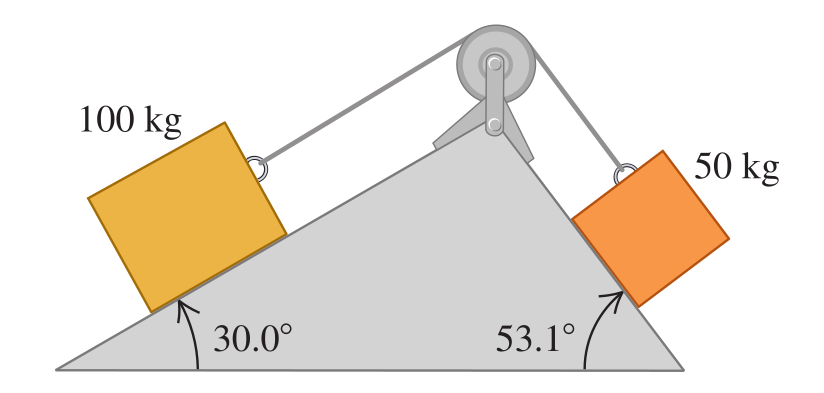

### 2) Steel ball on a conical pendulum - what is the period time? 

A steel ball of mass 1 kg is swinging on a rope of length 25 cm, drawing circles, as on p73 of the Gewirtz book (although with different data). How large is the tension in the rope? What is the period time? (3p)

### 3) How high can I shoot with a gun?

I shoot a .30 Luger vertically upwards. How high will its bullet travel? After how much time will the bullet hit the ground? What is its velocity upon impact? Calculate these quantities neglecting air resistance (drag). Now include air resistance in the form of a drag force 

$$ \mathbf{F}_\mathrm{drag} = -\rho C_d \frac{A}{2}  v^2 \frac{\mathbf{v}}{v} $$

You can no longer solve the problem on a piece of paper, but you can calculate the answers to the 3 questions above using the numerical solution of the problem. Plot the height-time curve of the bullet, and calculate these quantities. Compare the velocity with which the bullet falls back to the terminal velocity.(4p)

Density of air $\rho = 1.293\,\mathrm{kg/m}^3$.  Drag coefficient of a bullet: $C_d = 0.295$. For the cross-sectional area of a bullet, diameter: $7.82 \,\mathrm{mm}$. Muzzle velocity: $ 1330 \,\mathrm{km/h}$. Mass of bullet: $6.03 \,\mathrm{g}$. Try to calculate everything up to 3 significant digits.

# Exercises to be solved in class:


## How fast do we need to push cart so box does not fall? (13 min)
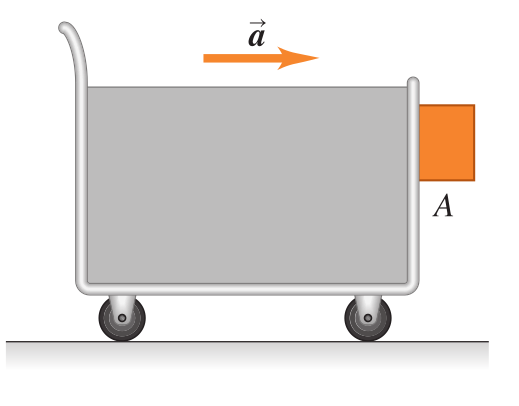

Mass of the block is $m_A = 1 $ kg. The coefficient of static friction is $\mu_s = 0.35$.

## Two heavy blocks of ice on an incline (13 min)
Take the image from homework 1, but let the two boxes correspond to two blocks of ice (neglect friction between the blocks and the incline). There is no static equilibrium now, the blocks will start to accelerate. In what direction? With what magnitude? 

## Related to the conical pendulum problem from Gewirtz (14 min)
Take a conical pendulum as in the image of homework 2, but with the length of the string and the angle $\alpha$ unspecified. The ball has the mass is 1 kg, and we want the radius to be r=50 cm, and the period time to be T=1 sec. How many Newtons should the resultant force on the ball be? What does that tell us, how large should the angle $\alpha$ be? Finally, how long should the string be in that case? 


## Summary of class: How Newton's 2nd law prescribes motion (5 min)
Use a 1D example



# Write a short python code useful for homework 3. 

Do it in various steps, incrementally. 

A coin is sliding off an inclined plane, angle of inclination 30 degrees, from a height of $h=$50 cm. The coefficient of friction is $ \mu = 0.4$. Plot the displacement as a function of time. Do the plot twice: first, using the analytical solution, then, by tracking the motion using Newton's second law, dividing the time up into small intervals of $ dt $. If $ dt $ is small enough, this should be OK.   

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'displacement along incline [m]')

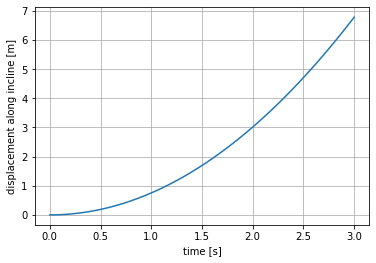

In [1]:
# 1 - I write this, kind of together with them (10 min)

%pylab inline
# data, using SI units:
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81

# analytical solution: 
a = g*(sin(theta) - mu*cos(theta))
t = linspace(0, 3, 1000)
s = a/2*t**2

plot(t, s)
grid()
xlabel("time [s]")
ylabel("displacement along incline [m]")

In [2]:
# 2 OK, but we only want to plot the motion until the object reaches
#  the bottom of the incline. How to do it? 

# I let them figure this out, then discuss the result:


time to bottom of incline: 1.15 seconds


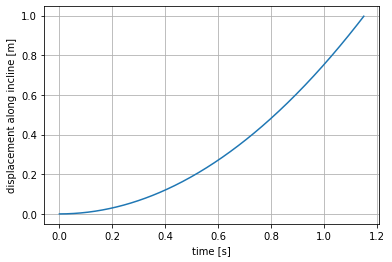

In [3]:
# Solution to 2:
#  Since we have an angle of 30 degrees, we know s_max is 1m.

s_max = h/sin(theta)
plot(t[s<s_max], s[s<s_max])

xlabel("time [s]")
ylabel("displacement along incline [m]")
grid()

print("time to bottom of incline: %.4g seconds"%(t[s<s_max][-1]))

We can read off the time needed for the coin to reach the bottom: roughly 1.2 seconds. 
We can also calculate this: 

$$ t = \sqrt{2s/a} = \sqrt{\frac{2h/\sin\theta}{g [\sin(\theta) - \mu \cos(\theta)]}} $$

# 1 Now for calculating the trajectory by stepping the time

What we are doing is called "integrating the equations of motion" using Euler's method. 

The main idea: from time $t$ to $t+dt$, the object 
1. moves because it has a velocity (need to update its position)
2. accelerates because it has an acceleration (need to update its velocity)
3. experiences maybe a new values of the forces (new position, new velocity) 
4. the sum of forces determines its acceleration (need to update acceleration)

### Outline of the algorithm:

1) Preparation: Initialize two empty list to collect the t and s values. You will use these lists to plot: `plot(t, s)`. Set the values of h, theta, mu, g.

2) Initial conditions: t, x, v, a should all be 0. 

3) *Loop* while the coin is still on the incline: 
* 0)    t = t + dt
* 1)    x = x + v dt
* 2)    a = sum of F / m
* 3)    v = v + a dt 
* 4)    append the t and x values to the lists t and s

4) Do the plot 


Total time: 1.25 seconds
Total time in theory: 1.1521 seconds


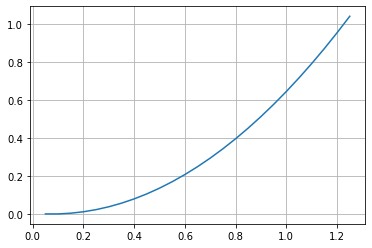

In [4]:
# 3 I let them work it out. 

# coin slipping on an inclined plane
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81
s_tot = h/sin(theta)
m = 0.005

# Choose the timestep dt as reasonably small (will check if small enough)  
dt = 0.05

#initial conditions:
s = 0
v = 0 
a = 0
t = 0
# python also allows you to write it in a more condensed way:
s, v, a, t = 0, 0, 0, 0

ss, tt = [], []

while s<s_tot:
    t_new = t + dt
    s_new = s + dt*v
    v_new = v + dt*a
    # Calculate the sum of forces, use it 
    #  for the new acceleration:
    a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
    t, s, v = t_new, s_new, v_new
    ss.append(s)
    tt.append(t)
    
plot(tt, ss)
grid()

print("Total time: %.5g seconds"%tt[-1])
print("Total time in theory: %.5g seconds"%(sqrt(2*h/sin(theta) 
                    / (g * (sin(theta) - mu*cos(theta))))))

In [ ]:
# 4) What we have looks good, but is a little off. 
# We should try to use smaller timesteps
#  put it in an outer loop, check 
#  with larger and smaller timesteps. 
#  Does it converge?

Total time in theory: 1.1521 seconds
Total time, dt=0.2:  1.6 seconds
Total time, dt=0.1:  1.4 seconds
Total time, dt=0.05:  1.25 seconds
Total time, dt=0.025:  1.2 seconds


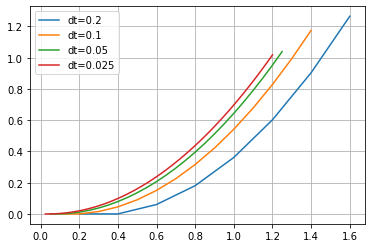

In [15]:
dt_vals = [0.2, 0.1, 0.05, 0.025]
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81
s_tot = h/sin(theta)
m = 0.005
print("Total time in theory: %.5g seconds"%(sqrt(2*h/sin(theta) 
                    / (g * (sin(theta) - mu*cos(theta))))))


# Choose the timestep dt as reasonably small (will check if small enough)  

trajectories_0 = []

for dt in dt_vals:
    s, v, a, t = 0, 0, 0, 0
    ss, tt = [], []

    while s<s_tot:
        t_new = t + dt
        s_new = s + dt*v
        v_new = v + dt*a
        # Calculate the sum of forces, use it 
        #  for the new acceleration:
        a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        t, s, v = t_new, s_new, v_new
        ss.append(s)
        tt.append(t)
        #t += dt
        #s += dt*v
        #a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        #v += dt*a
    trajectories_0.append([tt, ss])
    plot(tt, ss, label="dt=%.2g"%dt)
    
    print("Total time, dt=%.2g:  %.5g seconds"%(dt, tt[-1]))
legend()
grid()

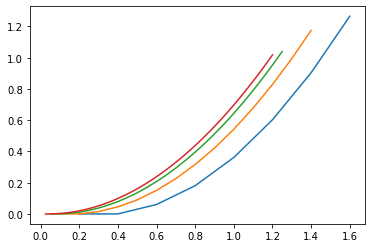

In [16]:
for traj in trajectories_0:
    plt.plot(traj[0], traj[1])
plt.show()


Total time in theory: 1.1521 seconds
Total time, dt=0.2:    1.4 seconds
Total time, dt=0.1:    1.3 seconds
Total time, dt=0.05:    1.2 seconds
Total time, dt=0.025:  1.175 seconds


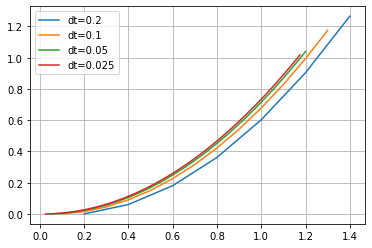

In [14]:
#dt_vals = [0.1, 0.01, 0.001, 0.0001]
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81
s_tot = h/sin(theta)
m = 0.005
print("Total time in theory: %.5g seconds"%(sqrt(2*h/sin(theta) 
                    / (g * (sin(theta) - mu*cos(theta))))))

# Choose the timestep dt as reasonably small (will check if small enough)  

for dt in dt_vals:
    s, v, a, t = 0, 0, 0, 0
    ss, tt = [], []

    while s<s_tot:
        t_new = t + dt
        v_new = v + dt*a
        s_new = s + dt*v_new
        # Calculate the sum of forces, use it 
        #  for the new acceleration:
        a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        t, s, v = t_new, s_new, v_new
        #if t==dt:
        #    v -= dt*0.5*a
        ss.append(s)
        tt.append(t)
        #t += dt
        #s += dt*v
        #a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        #v += dt*a
    
    plot(tt, ss, label="dt=%.2g"%dt)
    
    print("Total time, dt=%.2g:  %5.5g seconds"%(dt, tt[-1]))
legend()
grid()